<a href="https://colab.research.google.com/github/Pjh940114/Study_choonang/blob/main/%5Bch_0526%5D_CNN_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ImageDataGenerator를 이용해서 Cats and Dogs binary classification
# 문제를 해결해 보아요!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam  # 평균적으로 높은 효율을 내는 알고리즘
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# ImageDataGenerator 객체 생성
Train_Datagen =  ImageDataGenerator(rescale=1/255)
Test_Datagen =  ImageDataGenerator(rescale=1/255)

In [ ]:
train_dir = '/content/drive/MyDrive/자료/data'
test_dir = '/content/drive/MyDrive/자료/data'

In [ ]:
# ImageDataGenerator  설정

train_generator = Train_Datagen.flow_from_directory(
    train_dir,   # 학습용 이미지를 가져올 폴더
    classes=['paper', 'rock', 'scissors'],  # cats 포더의 이미지 label을 0으로
                                           #dogs 폴의 이미지는 label을 1로 설정
    target_size=(120, 120),    #이미지 resize
    batch_size=12,             #한번에 20개의 이미지만 가져와서 학습
    class_mode='categorical'        #이진분류인 경우 설정
)

test_generator = Test_Datagen.flow_from_directory(
    test_dir,   # 학습용 이미지를 가져올 폴더
    classes=['paper', 'rock', 'scissors'],  # cats 포더의 이미지 label을 0으로
                               #dogs 폴의 이미지는 label을 1로 설정
    target_size=(120, 120),    #이미지 resize
    batch_size=12,             #한번에 20개의 이미지만 가져와서 학습
    class_mode='categorical'        #이진분류인 경우 설정
)

Found 2892 images belonging to 3 classes.
Found 2892 images belonging to 3 classes.


In [ ]:
# CNN Model 구현

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(120,120,3)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

In [ ]:
# FC layer(DNN)의 input layer
model.add(Flatten())    # 전체 데이터를 4차원에서 2차원으로 변경

# hidden layer
model.add(Dense(units=64,
                activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=3,
                activation='softmax'))

In [ ]:
# print(model.summary())
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
# 설정이 다 되었으면 모델을 학습.
history = model.fit(train_generator,
          steps_per_epoch=241,
          epochs=20,
          verbose=1,
          validation_data=test_generator,
          validation_steps=12,
          callbacks=[early_stopping])

Epoch 1/20
241/241 [==============================] - 601s 2s/step - loss: 4.9860 - accuracy: 0.3268 - val_loss: 1.1000 - val_accuracy: 0.3125
Epoch 2/20
241/241 [==============================] - 8s 34ms/step - loss: 1.1006 - accuracy: 0.3150 - val_loss: 1.1019 - val_accuracy: 0.2986
Epoch 3/20
241/241 [==============================] - 8s 33ms/step - loss: 1.0995 - accuracy: 0.3427 - val_loss: 1.1049 - val_accuracy: 0.2917
Epoch 4/20
241/241 [==============================] - 8s 34ms/step - loss: 1.1001 - accuracy: 0.3292 - val_loss: 1.0981 - val_accuracy: 0.3611
Epoch 5/20
241/241 [==============================] - 8s 35ms/step - loss: 1.0998 - accuracy: 0.3292 - val_loss: 1.1033 - val_accuracy: 0.2986
Epoch 6/20
241/241 [==============================] - 8s 34ms/step - loss: 1.1006 - accuracy: 0.3281 - val_loss: 1.0988 - val_accuracy: 0.3125
Epoch 7/20
241/241 [==============================] - 8s 34ms/step - loss: 1.0999 - accuracy: 0.3316 - val_loss: 1.0995 - val_accuracy: 0.3264

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 116, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 58, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 64)                12845120  
                                                        

In [ ]:
import matplotlib.pyplot as plt

ValueError: ignored

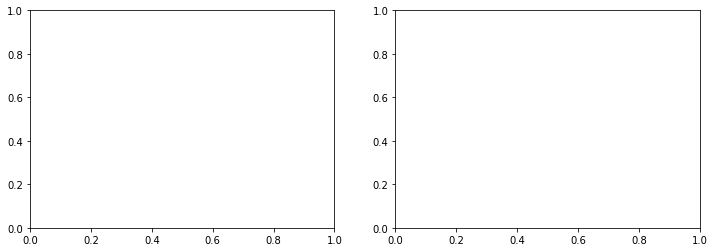

In [ ]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 20)